In [41]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [42]:
df = pd.read_csv('output.csv')

In [43]:
df.head()

,Unnamed: 0,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost
0,0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0
1,1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0
2,2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0
3,3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0
4,4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0


In [44]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [45]:
X = df.drop(columns=['rate'],axis=1)

In [46]:
X.head()

,name,online_order,book_table,votes,location,rest_type,cuisines,approx_cost
0,Jalsa,Yes,Yes,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0
1,Spice Elephant,Yes,No,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0
2,San Churro Cafe,Yes,No,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0
3,Addhuri Udupi Bhojana,No,No,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0
4,Grand Village,No,No,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0


In [47]:
print("Categories in 'name' variable:     ",end=" " )
print(df['name'].unique())

print("Categories in 'online_order' variable:  ",end=" ")
print(df['online_order'].unique())

print("Categories in'book_table' variable:",end=" " )
print(df['book_table'].unique())

print("Categories in 'location' variable:     ",end=" " )
print(df['location'].unique())

print("Categories in 'rest_type' variable:     ",end=" " )
print(df['rest_type'].unique())

print("Categories in 'cuisines' variable:     ",end=" " )
print(df['cuisines'].unique())

Categories in 'name' variable:      ['Jalsa' 'Spice Elephant' 'San Churro Cafe' ... 'Nawabs Empire'
 'SeeYa Restaurant'
 'Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...']
Categories in 'online_order' variable:   ['Yes' 'No']
Categories in'book_table' variable: ['Yes' 'No']
Categories in 'location' variable:      ['Banashankari' 'Basavanagudi' 'Mysore Road' 'Jayanagar'
 'Kumaraswamy Layout' 'Rajarajeshwari Nagar' 'Vijay Nagar' 'Uttarahalli'
 'JP Nagar' 'South Bangalore' 'City Market' 'Nagarbhavi'
 'Bannerghatta Road' 'BTM' 'Kanakapura Road' 'Bommanahalli'
 'CV Raman Nagar' 'Electronic City' 'HSR' 'Marathahalli' 'Wilson Garden'
 'Shanti Nagar' 'Koramangala 5th Block' 'Koramangala 8th Block'
 'Richmond Road' 'Koramangala 7th Block' 'Jalahalli'
 'Koramangala 4th Block' 'Bellandur' 'Sarjapur Road' 'Whitefield'
 'East Bangalore' 'Old Airport Road' 'Indiranagar' 'Koramangala 1st Block'
 'Frazer Town' 'RT Nagar' 'MG Road' 'Brigade Road' 'Lavelle Road'
 'Church Street' 'Ulsoor' 'Reside

In [48]:
y = df['rate']

In [49]:
y

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51143    3.6
51144    3.7
51145    3.7
51146    4.3
51147    3.4
Name: rate, Length: 51148, dtype: float64

In [50]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [51]:
X = preprocessor.fit_transform(X)

In [52]:
X.shape

(51148, 11619)

In [53]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((40918, 11619), (10230, 11619))

In [54]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [55]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.1142
- Mean Absolute Error: 0.0500
- R2 Score: 0.9163
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1473
- Mean Absolute Error: 0.0669
- R2 Score: 0.8625


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.3947
- Mean Absolute Error: 0.2836
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3973
- Mean Absolute Error: 0.2847
- R2 Score: -0.0008


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.1296
- Mean Absolute Error: 0.0779
- R2 Score: 0.8922
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1560
- Mean Absolute Error: 0.0950
- R2 Score: 0.8456


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1265
- Mean Absolute Error: 0.0595
- R2 Score: 0.8972
----------------------

In [56]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
8,Random Forest Regressor,0.945587
4,Decision Tree,0.937100
0,Linear Regression,0.862454
2,Ridge,0.845629
3,K-Neighbors Regressor,0.813434
6,CatBoosting Regressor,0.703140
5,XGBRegressor,0.682179
7,AdaBoost Regressor,0.263857
1,Lasso,-0.000784


## Random Forest Regressor	

In [66]:
RFR_model = RandomForestRegressor()
RFR_model = RFR_model.fit(X_train, y_train)
y_pred = RFR_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 94.63


Text(0, 0.5, 'Predicted')

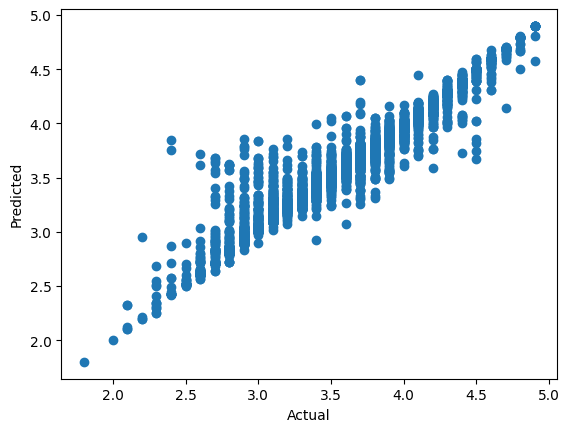

In [67]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='rate'>

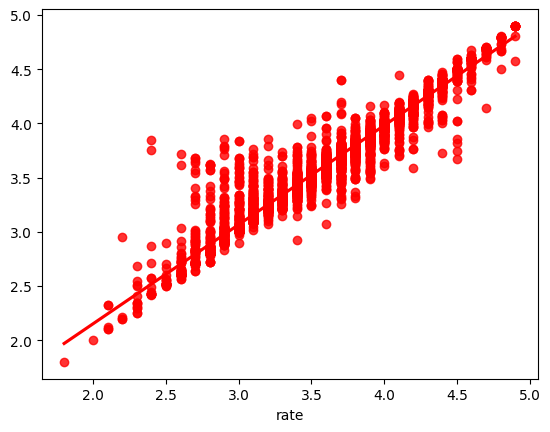

In [68]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [69]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
28041,3.2,3.2280,-2.800000e-02
30893,3.7,3.3122,3.878000e-01
11917,3.7,3.7000,-2.287059e-13
47794,3.1,3.2850,-1.850000e-01
12400,3.3,3.2870,1.300000e-02
...,...,...,...
26735,3.6,3.5480,5.200000e-02
31993,3.9,3.9030,-3.000000e-03
31350,3.0,3.0000,0.000000e+00
2301,3.4,3.4210,-2.100000e-02


## Decision Tree

In [70]:
DT_model = RandomForestRegressor()
DT_model = DT_model.fit(X_train, y_train)
y_pred = DT_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 94.66


Text(0, 0.5, 'Predicted')

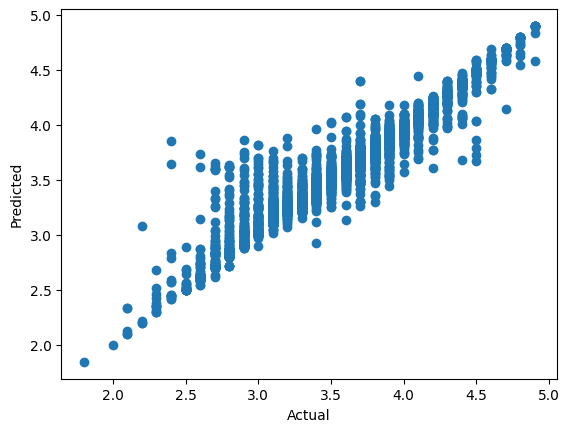

In [71]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='rate'>

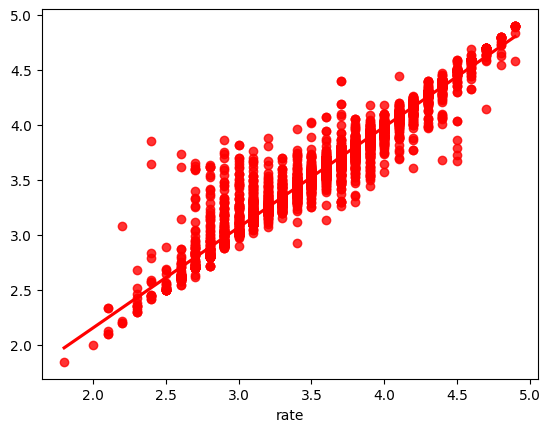

In [72]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [73]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
28041,3.2,3.241,-4.100000e-02
30893,3.7,3.305,3.950000e-01
11917,3.7,3.700,-2.278178e-13
47794,3.1,3.295,-1.950000e-01
12400,3.3,3.267,3.300000e-02
...,...,...,...
26735,3.6,3.555,4.500000e-02
31993,3.9,3.905,-5.000000e-03
31350,3.0,3.000,0.000000e+00
2301,3.4,3.406,-6.000000e-03


## Linear Regression

In [74]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 86.25


Text(0, 0.5, 'Predicted')

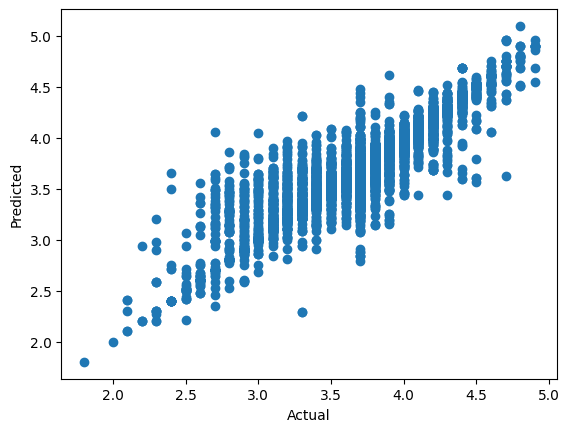

In [75]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='rate'>

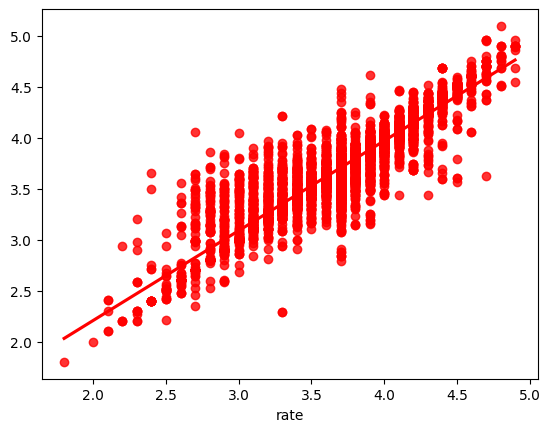

In [76]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [60]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
28041,3.2,3.299205,-0.099205
30893,3.7,3.544510,0.155490
11917,3.7,3.700064,-0.000064
47794,3.1,3.300087,-0.200087
12400,3.3,3.459481,-0.159481
...,...,...,...
26735,3.6,3.619951,-0.019951
31993,3.9,3.971135,-0.071135
31350,3.0,3.000032,-0.000032
2301,3.4,3.347564,0.052436
